<a href="https://colab.research.google.com/github/ken-alfi/UAS_Visi-Komputer/blob/main/Fitur_Ekstraksi_Tekstur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebelum kita memulai semuanya, mari kita mulai dengan mengimpor pustaka yang akan kita gunakan, seperti openCV, numpy, matplotlib, glob, dan skimage.

In [82]:
#impor library yang akan digunakan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

Langkah selanjutnya adalah mendefinisikan fungsi untuk metode yang akan kita eksekusi nanti. Fungsi pertama di bawah ini adalah fungsi <i>load_image()</i>. Tujuan dari fungsi ini adalah untuk memuat dataset/gambar dari komputer lokal dan menyimpannya ke dalam sebuah array. Nilai yang dikembalikan oleh fungsi ini adalah sebuah array gambar.

In [83]:
#membuat load_image yang berfungsi membaca gambar
def load_image(arr):
    strr = "Datasets/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

Fungsi selanjutnya adalah fungsi <i>preprocessing()</i>. Fungsi ini bertujuan untuk memproses dataset kita menjadi gambar skala keabuan.

In [84]:
#membuat rumus preprocessing yang berfungsi agar gambar berwarna diubah menjadi grayscale
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

Fungsi selanjutnya yang harus didefinisikan adalah <i>extractLBP()</i>. Tujuan dari fungsi ini adalah mengembalikan 2 nilai. Nilai pertama adalah hasil ekstraksi tekstur dalam bentuk gambar. Dan nilai kedua adalah hasil ekstraksi tekstur dalam bentuk vektor.

In [85]:
#membuat rumus extractLBP
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

Fungsi terakhir adalah <i> featureExtraction().</i> Fungsi ini bertujuan untuk mengembalikan array baru yang berisi tekstur yang diekstraksi, beserta vektornya.

In [86]:
#membuat rumus featureextraction
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

Langkah selanjutnya adalah memuat dataset dan menyimpannya dalam array

In [87]:
#memuat file dari dataset
data=[]
data=load_image(data)

Setelah memuat dataset, lalu melakukan proses rubah gambar ke greyscale

In [88]:
#memanggil data preprocessing
dataPreprocessed = preprocessing(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Tahap terakhir adalah mendapatkan hasil ekstraksi tekstur

In [89]:
#mendapatkan hasil vector
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


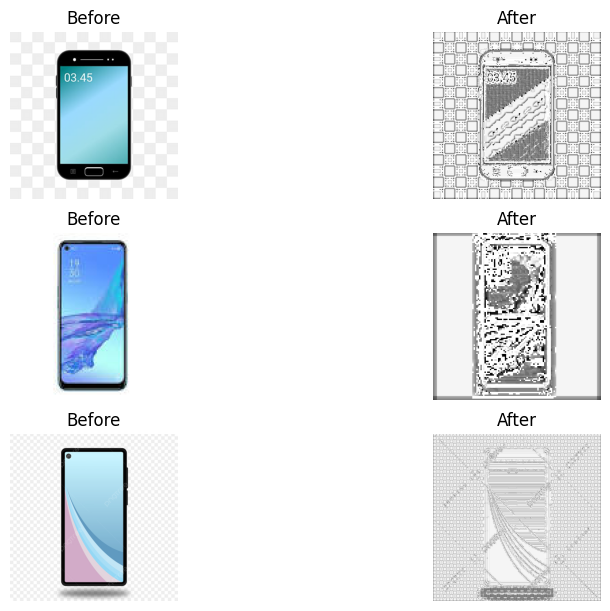

In [90]:
#menampilkan hasil tekstur pada gambar
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [91]:
#Menampilkan data vektor dari gambar
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.00496142 0.0179784  0.00160494 0.00446759 0.00106481 0.00409722
 0.00057099 0.0018287  0.00357253 0.00965278 0.01376543 0.02371914
 0.03208333 0.08611111 0.0126929  0.05094907 0.0076466  0.05989198
 0.00354167 0.00554784 0.00747685 0.01276235 0.00966049 0.01585648
 0.36584877 0.2426466 ]

Vector of Image 2 : [0.01443809 0.01391779 0.0069589  0.00442248 0.00273153 0.00260146
 0.00299168 0.0042924  0.00416233 0.00780437 0.01027575 0.01944589
 0.02620968 0.07036941 0.01352758 0.04624089 0.00513788 0.03869667
 0.00351197 0.00312175 0.00260146 0.00390219 0.00539802 0.01404787
 0.45492976 0.21826223]

Vector of Image 3 : [0.00745    0.01213889 0.00214028 0.00116667 0.00073125 0.00129861
 0.00080417 0.00103472 0.00136875 0.00611042 0.00670556 0.00734097
 0.008875   0.06845972 0.00340486 0.05921458 0.00199792 0.06548403
 0.00216042 0.00769583 0.00486111 0.01031458 0.01943542 0.01695556
 0.41756736 0.26528333]
